# FordGoBike: Data Analysis

## Investigation Overview

The aim of this investigation is to carry out an exploartory data analysis on the Ford GoBike dataset. We wanted to look at the charasitrastics of the bike riders and analyze them by the number of trips and trips duration. We used python data visualization libraries in order to explore the dataset.


## Dataset Overview

The data consists of information regarding 183,000 bike rides between two locations, it includes information about the rider and the duration of the trip. The data can be found [here](https://www.kaggle.com/chirag02/ford-gobike-2019feb-tripdata).


In [72]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

## Clean

In [73]:
# Reading dataset from CSV
bike_df = pd.read_csv('201902-fordgobike-tripdata.csv')
bike_clean_df = bike_df.copy()
bike_clean_df.drop(index=27370, inplace=True)
bike_clean_df.reset_index()
bike_clean_df.member_birth_year.fillna(bike_clean_df.member_birth_year.mean(), inplace=True)
bike_clean_df['member_birth_year'] = bike_clean_df['member_birth_year'].astype(int)
bike_clean_df['member_age'] = 2019 - bike_clean_df['member_birth_year']
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '+90']
bike_clean_df['age_bucket'] = pd.cut(bike_clean_df.member_age, bins, labels = labels,include_lowest = True)
bike_clean_df['age_bucket'] = bike_clean_df['age_bucket'].astype(str)
bike_clean_df['duration_min'] = bike_clean_df['duration_sec'] / 60

## Explanatory Data Analysis

## What is the average duration of bike trips?

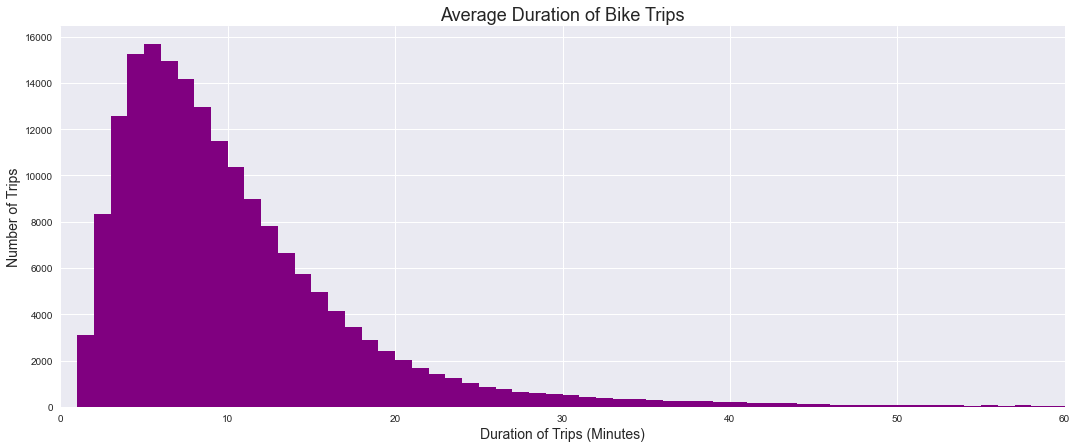

In [74]:
plt.figure(figsize=(18,7))
bins = np.arange(0, bike_clean_df['duration_min'].max() + 1, 1)
plt.hist(data = bike_clean_df, x = 'duration_min', bins = bins, color='purple');

plt.xlim(0, 60);
plt.title('Average Duration of Bike Trips', fontsize = 18);
plt.xlabel('Duration of Trips (Minutes)', fontsize = 14);
plt.ylabel('Number of Trips', fontsize = 14);
plt.style.use('seaborn');

 **As we can see the right-skewed in the histogram because most values are located left-hand side. The duration of the trip in minutes for all bike rides is between 0 and 60 minutes. The average duration of most trips lasts between 1 and just over 30 minutes with the majority of rides lasting just under 20 minutes. So generally speaking, people are using these bikes for quick rides around ~6 minutes.**

## What is the average age of bike riders?

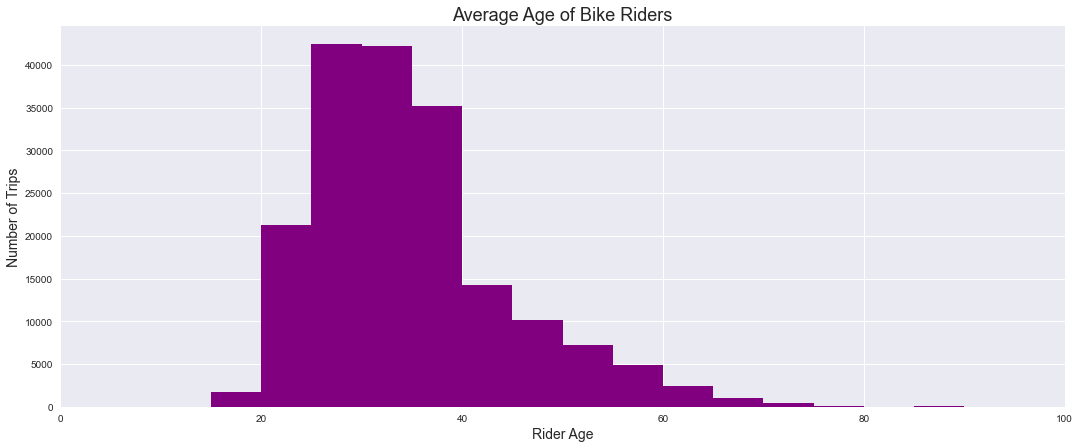

In [75]:
plt.figure(figsize=(18,7))
bins = np.arange(10, 100 + 5, 5)
plt.hist(data = bike_clean_df, x = 'member_age', bins = bins, color='purple');

plt.xlim(0, 100);
plt.title('Average Age of Bike Riders', fontsize = 18);
plt.xlabel('Rider Age', fontsize = 14);
plt.ylabel('Number of Trips', fontsize = 14);
plt.style.use('seaborn');

**The average age of most riders is between 20 and just over 50 years old with the majority of rides lasting just under 40 years old that is why we can see the right-skewed in the graph. So in conclusion, we can say the average age of riders is around ~34 minutes.**

## What is the average duration for each gender?

In [76]:
duration_above_60 = bike_clean_df.query("duration_min < 60")


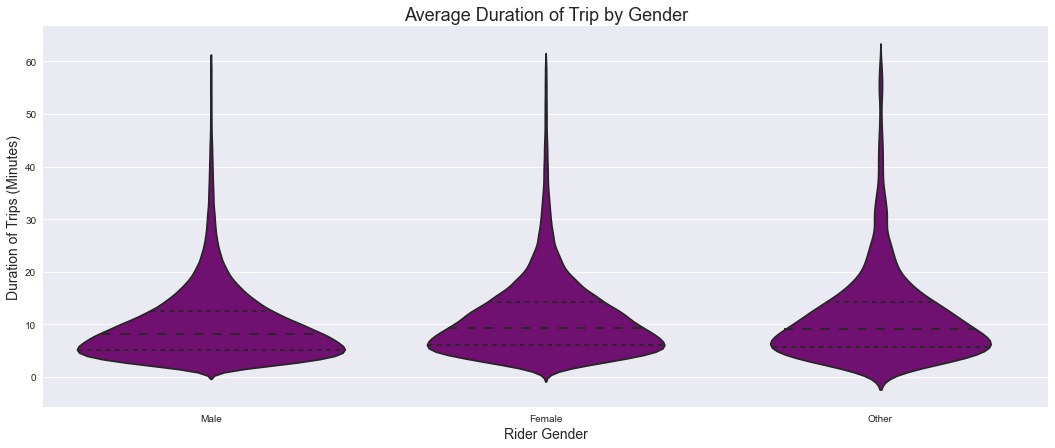

In [77]:
# plot relationship between gender and duration
plt.figure(figsize=(18,7))

sb.violinplot(data=duration_above_60, x='member_gender', y='duration_min', color='purple', inner='quartile')
plt.title('Average Duration of Trip by Gender', fontsize = 18);
plt.xlabel('Rider Gender', fontsize = 14);
plt.ylabel('Duration of Trips (Minutes)', fontsize = 14);

**In the above chart, we selected trips which the duration were below 60 minutes. All the three violin charts look similar in terms of data distribution. The three types have almost the same mean around 10 minutes.**

## What is the average duration for each type?

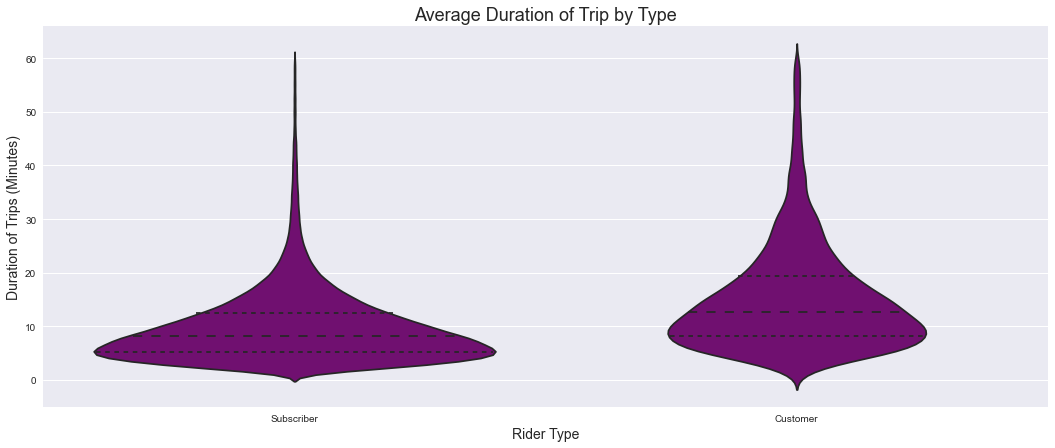

In [78]:
# plot relationship between gender and duration
plt.figure(figsize=(18,7))

sb.violinplot(data=duration_above_60, x='user_type', y='duration_min', color='purple', inner='quartile')
plt.title('Average Duration of Trip by Type', fontsize = 18);
plt.xlabel('Rider Type', fontsize = 14);
plt.ylabel('Duration of Trips (Minutes)', fontsize = 14);

 **The above chart shown the duraiton rides in minutes in terms of user type. Customer users tend to ride the bikes for a longer duration than the subscriber, and this might the customer users usually tourists that ride the bike for transporting between the cities.**

## What is the ride's duration people of different ages bucket?

In [79]:
bike_clean_age_df =  bike_clean_df.sort_values('member_age', ascending = True).reset_index(drop=True)

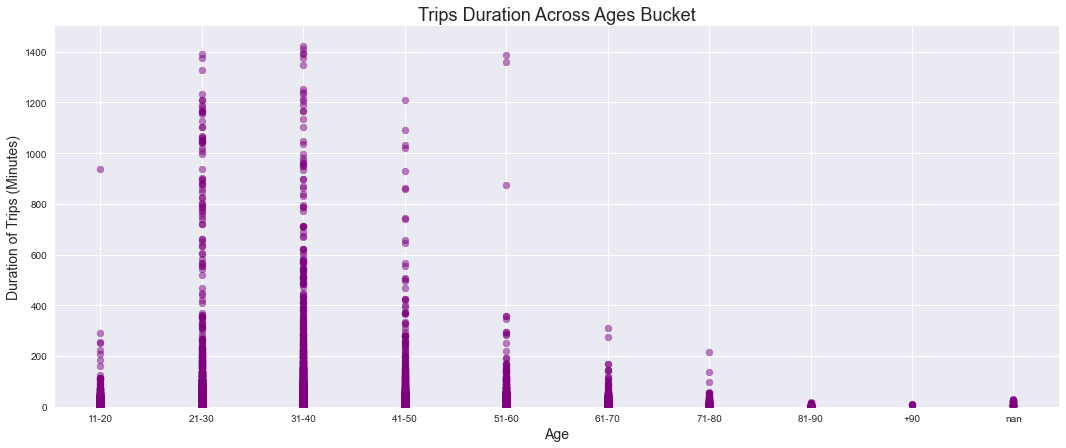

In [80]:
plt.figure(figsize=(18,7))

plt.scatter(data = bike_clean_age_df, x = 'age_bucket', y = 'duration_min',  alpha = .5, color = 'purple');
# plt.xlim(15, 90);
plt.ylim(0, 1500);
plt.title('Trips Duration Across Ages Bucket', fontsize = 18);
plt.xlabel('Age', fontsize = 14);
plt.ylabel('Duration of Trips (Minutes)', fontsize = 14);
plt.style.use('seaborn')

**The figure is shown the trip duration in minutes in terms of the Ages bucket. Riders between the ages of _21_ and _30_, and the ages between _31_ and _40_ tend to ride the bike for a longer time than the other riders. Normally, rider with above 80 years old is the least in rides duration.**

## What is the ride's duration for each gender for different ages bucket?

In [81]:
bike_clean_age_df = bike_clean_age_df.query("member_age <= 90")


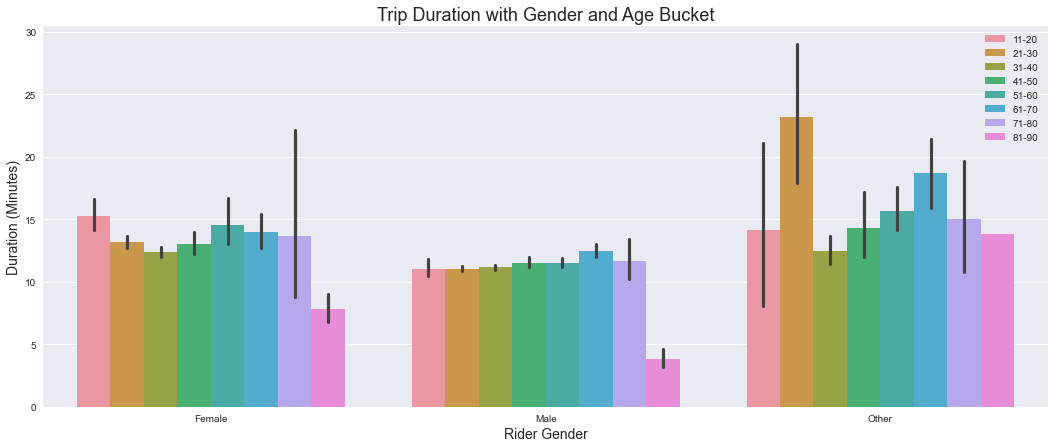

In [82]:
# create bar plot 
plt.figure(figsize=(18,7))

ax = sb.barplot(x='member_gender', y = 'duration_min', hue='age_bucket' , data=bike_clean_age_df.sort_values('member_age'))

plt.title('Trip Duration with Gender and Age Bucket', fontsize = 18);
plt.xlabel('Rider Gender', fontsize = 14);
plt.ylabel('Duration (Minutes)', fontsize = 14);
legend = ax.legend()

**This figure is shown the trip duration for each gender type in terms of age grouping. In general, female has the longer trip average duration than the male. However, in all gender rider who are younger than 40 are willing to ride the bike more. The highest trip duration for the other gender with age from 21 to 30 years old.**

## Counclusion

- **Female takes longer trips than male.** One of the most interesting facts that female has the longer trip average duration than the male. Across all ages, the differences between the duration of male riders and female riders are noticeable. However, the other gender type has a higher average duration than both females and males.

- **Usually people are using the bike for quick rides.** Most of the riders use the bike for a quick trip an average of 6 minutes. This might be because of the subscribers who are going inside the cities between home to school or work. 

- **Ages of _21_ and _40_ tend to ride the bike for a longer time.** Not surprisingly, we have seen the younger people tend to ride the bike for longer trips. People in their 20s and 30s are expected to have longer trips than 40s and 50s. and that's why the right skew does exist in the histogram. 
